In [13]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# csv loading
france_df = pd.read_csv('./france.csv')
spain_df = pd.read_csv('./spain.csv')
taiwan_df = pd.read_csv('./taiwan.csv')
print("France\n", france_df.head())
print("Spain\n", spain_df.head())
print("Taiwan\n", taiwan_df.head())

France
    index                                               name price  \
0      0  Poulet fermier blanc Label Rouge FERMIERS DE LOUE  9,75   
1      1                        Filets de chicken CARREFOUR  9,25   
2      2  Poulet jaune d'Auvergne Label Rouge FILIERE QU...  9,66   
3      3         Filets de chicken blanc CARREFOUR CLASSIC'  7,67   
4      4  Poulet blanc d'Auvergne Label Rouge FILIERE QU...  9,66   

   price_per_kg category  
0          6.50  chicken  
1         10.89  chicken  
2          6.90  chicken  
3         15.35  chicken  
4          6.90  chicken  
Spain
                                                 name                id  \
0  Manzana granny smith Carrefour a granel 1 kg a...  VC4AECOMM-094469   
1              Manzana Golden Carrefour cesta 1,5 kg      fprod1460515   
2         Manzana fuji Carrefour a granel 1 kg aprox  VC4AECOMM-094467   
3  Manzana royal gala Carrefour a granel 1 kg aprox   VC4AECOMM-094468   
4                  Manzana roja Carref

In [15]:
# checking missing values
france_df.drop(france_df.columns[0], axis=1, inplace=True)

france_df.isna().any()
spain_df.isna().any()
taiwan_df.isna().any()
taiwan_df.head()

,id,name,measure_unit,price,category2,subcategory,datetime,country
0,2202117500101,TAP Apple vegetable sponge,1,49.0,Apple,Vegetables,2023-06-05,Taiwan
1,2212012600106,Fuji Apple#110,6,60.0,Apple,Season Fruits,2023-06-05,Taiwan
2,2212013500105,Fuji Apple#90,5,99.0,Apple,Season Fruits,2023-06-05,Taiwan
3,2217700700101,Bullet Wax Apple/box,1,59.0,Apple,Season Fruits,2023-06-05,Taiwan
4,2212013500104,Fuji Apple#90,4,100.0,Apple,Season Fruits,2023-06-05,Taiwan


In [38]:
group_france = france_df.groupby('category')
group_spain = spain_df.groupby('category2')
group_taiwan = taiwan_df.groupby('category2')
dfs_france = {}
dfs_spain = {}
dfs_taiwan = {}
categories = ["chicken", "apple", "salmon", "eggs", "lettuce", "tomatoes", "bananas", "carrots", "cheese", "baguette"]

def extract_france_label(group):
    tmp = dict()
    tmp['names'] = group.iloc[:, 0]
    tmp['prices'] = np.array(group.iloc[:, 1].str.replace(',', '.').astype(float))
    tmp['prices_per_kg'] = np.array(group.iloc[:, 2].astype(float))
    tmp['category'] = group.iloc[:, 3]
    return tmp

# name,id,category2,subcategory,measure_unit,price,price_per_unit,sell_pack_unit,datetime,category,country
def extract_spain_label(group):
    tmp = dict()
    tmp['names'] = group.iloc[:, 0]
    tmp['prices'] = np.array(group.iloc[:, 5].str.replace(',', '.').str.replace(' €', '').astype(float))
    tmp['category'] = group.iloc[:, 2]
    return tmp

# id,name,measure_unit,price,category2,subcategory,datetime,country
def extract_taiwan_label(group):
    tmp = dict()
    tmp['names'] = group.iloc[:, 1]
    tmp['prices'] = np.array(group.iloc[:, 3].astype(float))
    tmp['category'] = group.iloc[:, 4]
    return tmp

for name, group in group_france:
    dfs_france[name] = extract_france_label(group)
for name, group in group_spain:
    dfs_spain[name] = extract_spain_label(group)
for name, group in group_taiwan:
    dfs_taiwan[name] = extract_taiwan_label(group)

france = dict()
for c in categories:
    if c in dfs_france:
        france[c] = dfs_france[c]
taiwan = dict()
for c in categories:
    if c in dfs_taiwan:
        taiwan[c] = dfs_taiwan[c]
spain = dict()
for c in categories:
    if c in dfs_spain:
        spain[c] = dfs_spain[c]

AttributeError: 'Series' object has no attribute 'lower'

In [37]:
print(france['chicken']["prices"].mean())
print(taiwan['apple']["prices"].mean())
print(spain['salmon']["prices"].mean())


9.011045751633988


KeyError: 'apple'

[[7 6 9]
 [4 3 9]
 [7 5 4]
 [2 4 3]]


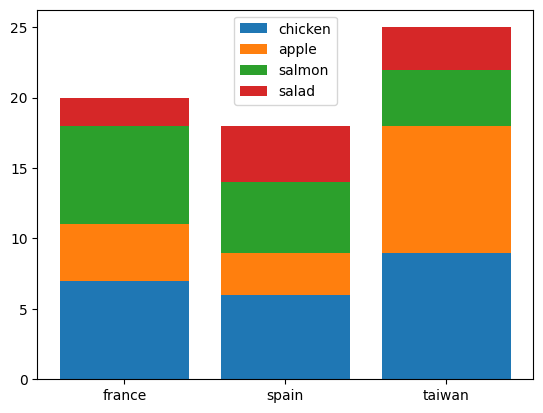

In [129]:
def plot_bar(prices):
    # Define the country names
    countries = ['france', 'spain', 'taiwan']
    products = ['chicken', 'apple', 'salmon', 'salad']
    # Get the number of countries and prices
    old_value = 0
    for i, p in enumerate(prices):
        plt.bar(range(len(p)), p, bottom=old_value, label=products[i])
        old_value += p
    plt.xticks([0, 1, 2], countries)
    plt.legend()
    plt.show()

column_list = []

france_data = [7, 4, 7, 2]
#for cat in france:
#    print(cat)
#    france_data.append(cat["prices"].mean())
spain_data = np.array([6, 3, 5, 4])
taiwan_data = np.array([9, 9, 4, 3])

# Column 1
column_list.append(france_data)
# Column 2
column_list.append(spain_data)
# Column 3
column_list.append(taiwan_data)
# Combine the column arrays into a 2D array using column_stack()
data = np.column_stack(column_list)
print(data)


plot_bar(data)